# Bank Churn Analysis Project (Data Preparation and Exploratory Data Analysis - EDA)

## First Step : Import and Query the Data

- First, we import the data from both tabs in the "Bank_Churn_Messy" Excel file
- Next, we use a left join to join "Account_Info" to "Customer_Info" using the CustomerID column
- Then, we check for and remove duplicate rows and columns

In [1]:
# import the first sheet in the Excel workbook
import pandas as pd
churn_cust_info = pd.read_excel("Bank_Churn_Messy.xlsx")
churn_cust_info.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1


In [2]:
# import the second sheet in the Excel workbook
import pandas as pd
churn_act_info = pd.read_excel("Bank_Churn_Messy.xlsx", sheet_name="Account_Info")
churn_act_info.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0


In [3]:
# use a left join

churn_data = churn_cust_info.merge(churn_act_info, how = "left", on = "CustomerId")
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0


In [4]:
# check and count any available duplicated values
churn_data.duplicated().sum()

4

In [5]:
# removing duplicates
churn_data = churn_data.drop_duplicates()

## Step 2: Clean the Data

- Check the data types for each column and make any necessary fixes
- Replace missing values
- Profile the numeric columns in the data. Are there any extreme or non-sensical values? If so, impute them with the median of the column
- Combine any variations in country names in the "Geography" column to a single value per country

In [6]:
# view data info 
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10000
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              9997 non-null   float64
 6   Tenure_x         10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  object 
 8   Balance          10000 non-null  object 
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  Tenure_y         10000 non-null  int64  
 12  IsActiveMember   10000 non-null  object 
 13  Exited           10000 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


In [7]:
churn_data = churn_data.drop("Tenure_y", axis=1).rename({"Tenure_x": "Tenure"}, axis=1)
churn_data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1,€125510.82,1,Yes,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39.0,5,€96270.64,€0.0,2,No,No,0
9997,15569892,Johnstone,516,French,Male,35.0,10,€101699.77,€57369.61,1,Yes,Yes,0
9998,15584532,Liu,709,FRA,Female,36.0,7,€42085.58,€0.0,1,Yes,Yes,1
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52,€75075.31,2,No,No,1


In [8]:
churn_data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1,€125510.82,1,Yes,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39.0,5,€96270.64,€0.0,2,No,No,0
9997,15569892,Johnstone,516,French,Male,35.0,10,€101699.77,€57369.61,1,Yes,Yes,0
9998,15584532,Liu,709,FRA,Female,36.0,7,€42085.58,€0.0,1,Yes,Yes,1
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52,€75075.31,2,No,No,1


In [9]:
# remove unwanted values using the str.replace function
churn_data["EstimatedSalary"] = churn_data["EstimatedSalary"].str.replace('€',"").astype(float)
churn_data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,101348.88,€0.0,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,€83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,113931.57,€159660.8,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,93826.63,€0.0,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,79084.10,€125510.82,1,Yes,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39.0,5,96270.64,€0.0,2,No,No,0
9997,15569892,Johnstone,516,French,Male,35.0,10,101699.77,€57369.61,1,Yes,Yes,0
9998,15584532,Liu,709,FRA,Female,36.0,7,42085.58,€0.0,1,Yes,Yes,1
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,92888.52,€75075.31,2,No,No,1


In [10]:
churn_data["Balance"] = churn_data["Balance"].str.replace('€',"").astype(float)
churn_data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,93826.63,0.00,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39.0,5,96270.64,0.00,2,No,No,0
9997,15569892,Johnstone,516,French,Male,35.0,10,101699.77,57369.61,1,Yes,Yes,0
9998,15584532,Liu,709,FRA,Female,36.0,7,42085.58,0.00,1,Yes,Yes,1
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,92888.52,75075.31,2,No,No,1


In [11]:
# remove missing values

churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              9997 non-null   float64
 6   Tenure           10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 1.1+ MB


In [12]:
# there are 3 missing values each in Surname and Age 

churn_data[churn_data.isna().any(axis = 1) == True]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
29,15728693,NaN,574,Germany,Female,NaN,3,-999999.0,141349.43,1,Yes,Yes,0
122,15580203,NaN,674,Spain,Male,NaN,6,-999999.0,120193.42,1,No,No,0
9390,15756954,NaN,538,France,Female,NaN,2,-999999.0,0.00,1,Yes,Yes,0


In [13]:
# replacing the missing data
churn_data = churn_data.fillna(value = {"Surname" : "Missing", "Age" : churn_data["Age"].median()})

# run the last cell again to see if there are still any missing values
churn_data[churn_data.isna().any(axis = 1) == True]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited


In [14]:
# check the data we filled in
churn_data.iloc[[28, 121, 9389]]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
29,15728693,Missing,574,Germany,Female,37.0,3,-999999.0,141349.43,1,Yes,Yes,0
122,15580203,Missing,674,Spain,Male,37.0,6,-999999.0,120193.42,1,No,No,0
9390,15756954,Missing,538,France,Female,37.0,2,-999999.0,0.00,1,Yes,Yes,0


In [15]:
churn_data.describe()

,CustomerId,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921500,5.012800,99762.195289,76485.889288,1.530200,0.203700
std,7.193619e+04,96.653299,10.487552,2.892174,60583.863580,62397.405202,0.581654,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,-999999.000000,0.000000,1.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,50910.677500,0.000000,1.000000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,100191.725000,97198.540000,1.000000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,149388.247500,127644.240000,2.000000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,199992.480000,250898.090000,4.000000,1.000000


In [16]:
# results show that Estimated Salary has a min figurs of negative 999999.000000
# we need to fix this as it is impossible to have a negative income
# we will replace instances of 999999.000000 with the median of all the salaries

churn_data["EstimatedSalary"] = churn_data["EstimatedSalary"].replace(-999999,churn_data["EstimatedSalary"].median())

# check if it has been fixed
churn_data.describe()

,CustomerId,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921500,5.012800,100092.252506,76485.889288,1.530200,0.203700
std,7.193619e+04,96.653299,10.487552,2.892174,57510.146401,62397.405202,0.581654,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,11.580000,0.000000,1.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,51002.110000,0.000000,1.000000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,100196.062500,97198.540000,1.000000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,149388.247500,127644.240000,2.000000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,199992.480000,250898.090000,4.000000,1.000000


In [17]:
# fix the geography issue
churn_data["Geography"].value_counts()

Germany    2509
Spain      2477
France     1741
French     1655
FRA        1618
Name: Geography, dtype: int64

In [18]:
# we have 3 distinct values that seem to represent the same location - France. These are 'France', 'French' & 'FRA'
# let's fix this with the replace function

churn_data["Geography"] = churn_data["Geography"].replace("French", "France")

In [19]:
churn_data["Geography"] = churn_data["Geography"].replace("FRA", "France")

In [20]:
# Run the code again to see the Geography Distinct values
churn_data["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [21]:
# cumulate the code into one

churn_data = (
    pd.read_excel("Bank_Churn_Messy.xlsx")
    .merge(churn_act_info, how="left", on="CustomerId")
    .drop("Tenure_y", axis=1).rename({"Tenure_x": "Tenure"}, axis=1)
    .drop_duplicates()
    .assign(
        EstimatedSalary=lambda x: x["EstimatedSalary"].str.replace('€', "").astype(float),
        Balance=lambda x: x["Balance"].str.replace('€', "").astype(float),
        Geography=lambda x: x["Geography"].replace("French", "France")
    )
    .assign(
        EstimatedSalary=lambda x: x["EstimatedSalary"].replace(-999999, x["EstimatedSalary"].median()),
        Geography=lambda x: x["Geography"].replace("FRA", "France")
    )
)

# Fill missing values
churn_data = churn_data.fillna(value={"Surname": "Missing", "Age": churn_data["Age"].median()})

churn_data


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,15619304,Onio,502,France,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,15701354,Boni,699,France,Female,39.0,1,93826.63,0.00,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39.0,5,96270.64,0.00,2,No,No,0
9997,15569892,Johnstone,516,France,Male,35.0,10,101699.77,57369.61,1,Yes,Yes,0
9998,15584532,Liu,709,France,Female,36.0,7,42085.58,0.00,1,Yes,Yes,1
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,92888.52,75075.31,2,No,No,1


### Why I Used lambda Instead of Directly Referencing the DataFrame `churn_data`

- **Method Chaining**: By using lambda within .assign(), I can keep the code concise and readable, allowing multiple transformations to be applied in a single, continuous flow without breaking the chain of operations.

- **Ensuring Context**: The lambda function ensures that each transformation is applied directly to the version of the DataFrame as it exists at that specific point in the chain. This way, I avoid accidentally referencing an earlier version of the DataFrame.

- **Avoiding Extra Variables**: Using lambda helps me avoid creating unnecessary intermediate variables, keeping the code cleaner and reducing the chances of errors.

- **In-place Transformation**: The lambda functions allow me to define transformations on-the-fly, applying changes directly within the .assign() method without needing to make multiple, separate lines of code.

## Step 3: Exploratory Data Analysis

- Here, we want to explore the target variable and look at feature-target relationships for categorical and numeric fields. We do this by:

    - Building a bar chart displaying the count of churners (Exited=1) vs. non-churners (Exited=0)
    - Exploring the categorical variables vs. the target, and look at the percentage of Churners by “Geography” and “Gender”
    - Building box plots for each numeric field, broken out by churners vs. non-churners
    - Building histograms for each numeric field, broken out by churners vs. non-churners

<AxesSubplot:>

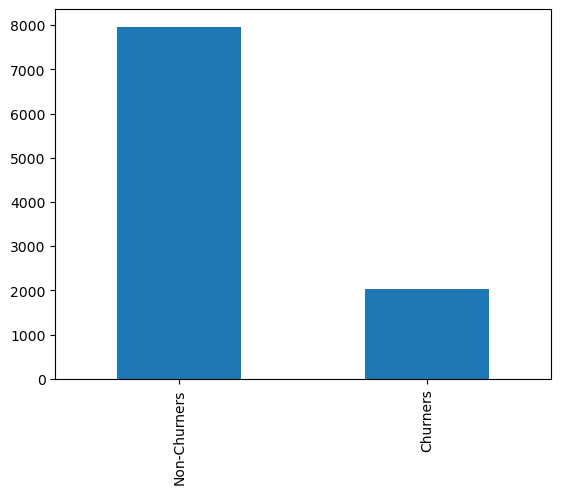

In [22]:
bar_churns = churn_data["Exited"].value_counts()
bar_churns.index = ["Non-Churners", "Churners"]
bar_churns.plot.bar()

<AxesSubplot:xlabel='Geography', ylabel='Exited'>

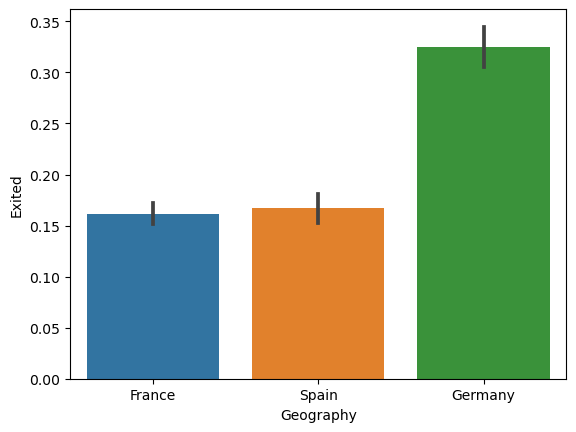

In [23]:
import seaborn as sns

sns.barplot(data = churn_data, x = "Geography", y= "Exited")

In [24]:
# we want to plot a chart for other variables in our dataset, so for this we use;
# the for loop and matplotlib

import matplotlib.pyplot as plt

# first, let us look at all the data types we have first to ensure we are plotting for the correct caategorical data types

churn_data.select_dtypes ("object")

,Surname,Geography,Gender,HasCrCard,IsActiveMember
0,Hargrave,France,Female,Yes,Yes
2,Hill,Spain,Female,Yes,Yes
3,Onio,France,Female,No,No
4,Boni,France,Female,No,No
5,Mitchell,Spain,Female,Yes,Yes
...,...,...,...,...,...
9996,Obijiaku,France,Male,No,No
9997,Johnstone,France,Male,Yes,Yes
9998,Liu,France,Female,Yes,Yes
9999,Sabbatini,Germany,Male,No,No


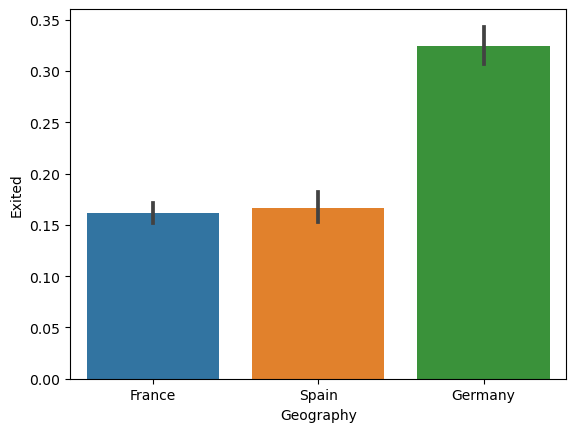

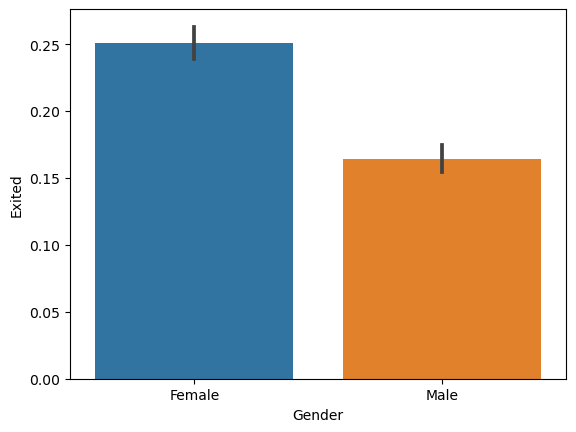

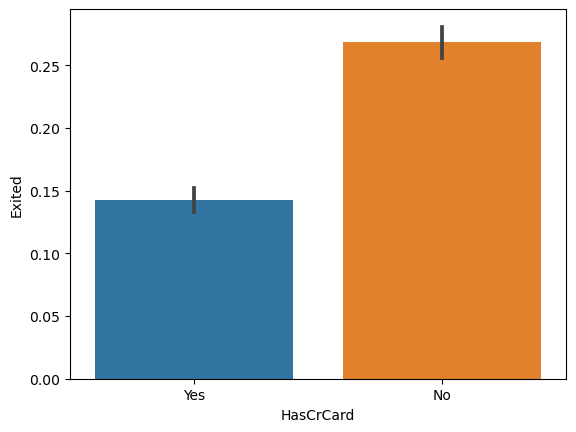

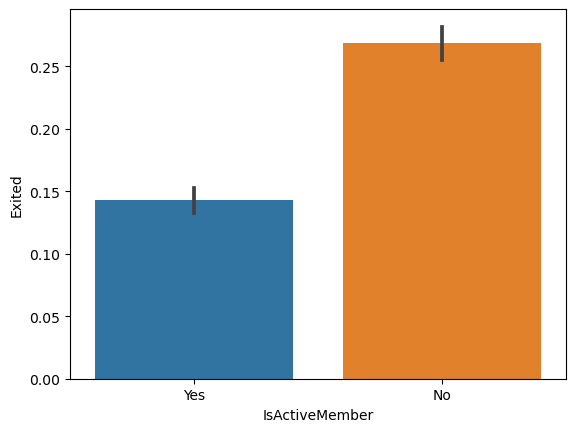

In [25]:
# so the Surname is not a categorical data, we have to drop it

for var in churn_data.drop("Surname", axis = 1).select_dtypes("object"):
    sns.barplot(data = churn_data, x = var , y = "Exited")
    plt.show()

- From the graphs for our categorical variables, we can conclude the following:

    - Germany customers have twice the churn rate compared to France and Spain customers
    - Female customers have a higher churn rate than male customers
    - Customers with no Credit Card have a higher churn rate than the ones with credit cards
    - Dormant customers have a higher churn rate compared to active bank customers 

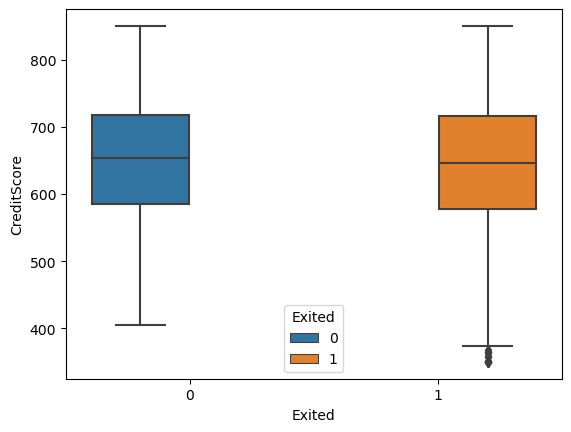

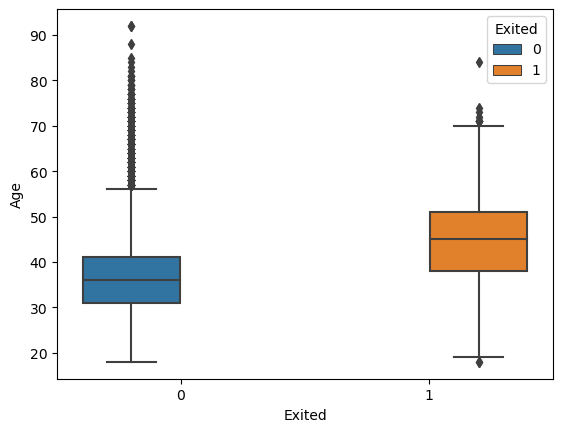

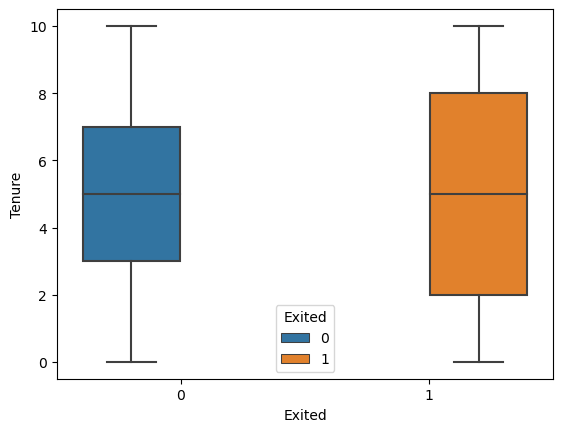

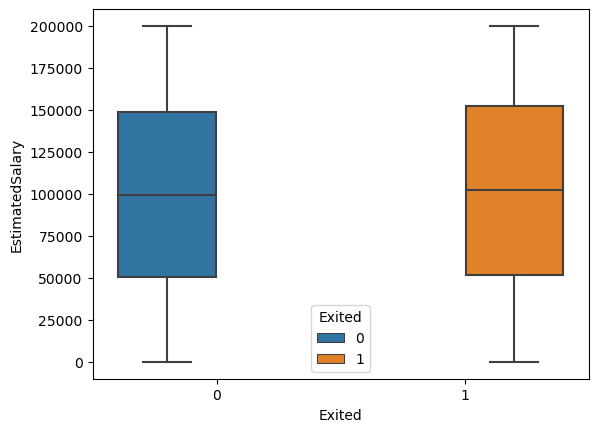

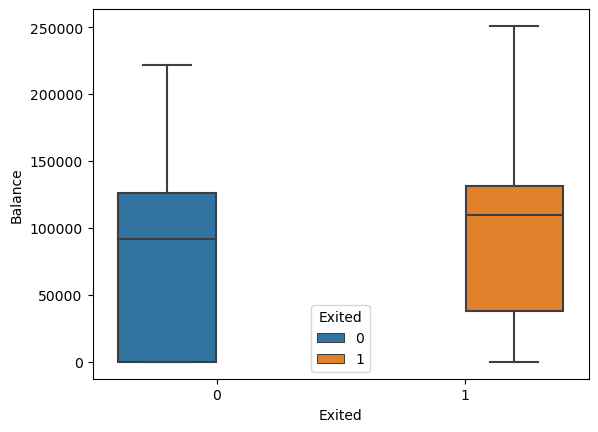

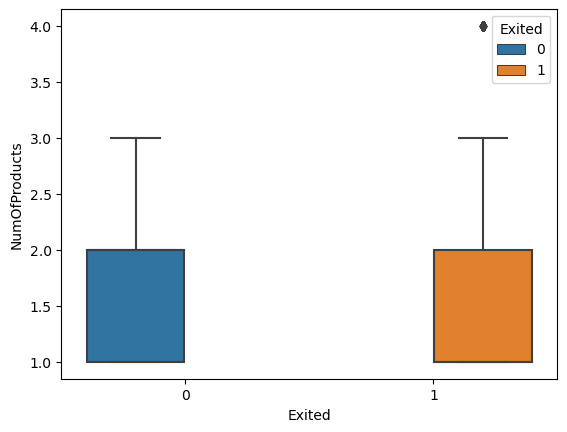

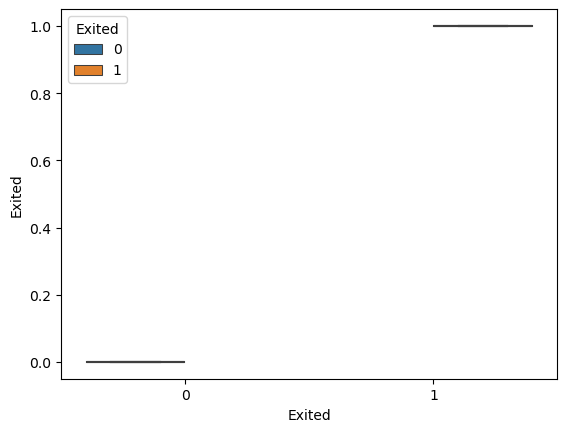

In [26]:
# next, we explore our numerical variables
# we will use the seaborn box plots
# here, we are dropping customer ID because it is not a useful numerical variable here for the EDA
for var in churn_data.drop("CustomerId", axis = 1).select_dtypes("number"):
    sns.boxplot(data=churn_data, x= "Exited", y = var, hue="Exited")
    plt.show()

From the above graphs, we can arrive at the following insights:

- **Credit Score:**
    - The median credit score for both churners (Exited = 1) and non-churners (Exited = 0) is similar, around 650.
    - However, churners have a slightly wider range, with more lower-end outliers around the 400-500 mark, compared to non-churners.

- **Age:**
    - Churners tend to be older, with a median age around 45, compared to non-churners whose median age is closer to 35.
    - There are more outliers for non-churners on the higher end (age 60+), but the overall distribution shows that age is skewed higher for those who have exited.

- **Tenure:**
    - The median tenure for non-churners is about 5 years, whereas churners have a slightly lower median tenure of around 4 years.
    - The distribution for both is similar, but churners exhibit a slightly broader range, indicating variability in the length of time before exiting.

- **Estimated Salary:**
    - The estimated salary distribution does not show a marked difference between churners and non-churners.
    - Both groups have a median salary of around €100,000, and the range extends from near €0 to €200,000, suggesting salary is not a significant differentiator.

- **Balance:**
    - Churners have a more varied account balance, ranging up to €250,000, while non-churners have a tighter range mostly below €200,000.
    - The median balance for churners is slightly higher, indicating that those exiting tend to either have higher balances or exhibit more financial fluctuation.

- **Number of Products:**
    - Both groups mostly have 1-2 products, but churners exhibit a slight trend toward having 2-3 products more frequently, suggesting over-leveraging might contribute to customer churn.
    - Outliers with 4 products are more common among churners, hinting at possible product overextension as a factor for exiting.

### Histogram Plot and KDE

- Next, we want to visualize the same data using a histogram, and here we use the KDE (Kernel Density Estimate). 

- The KDE is a smooth curve that represents the distribution of the data, helping us to see the overall shape and trends more clearly. 

- It smooths out the bars of the histogram, making it easier to identify patterns, clusters, and peaks within the data, even when there might be some variability in the bar heights. This gives a better visual representation of where most of the data points are concentrated.

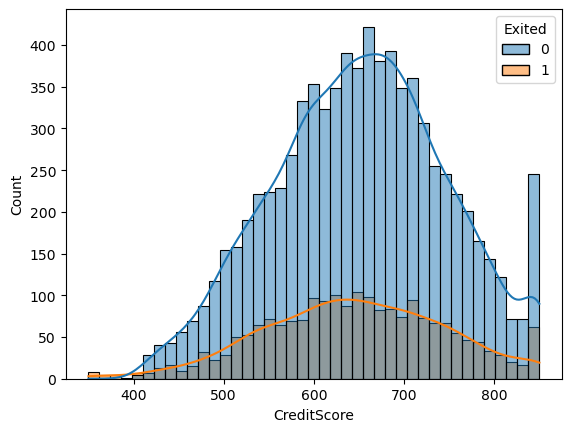

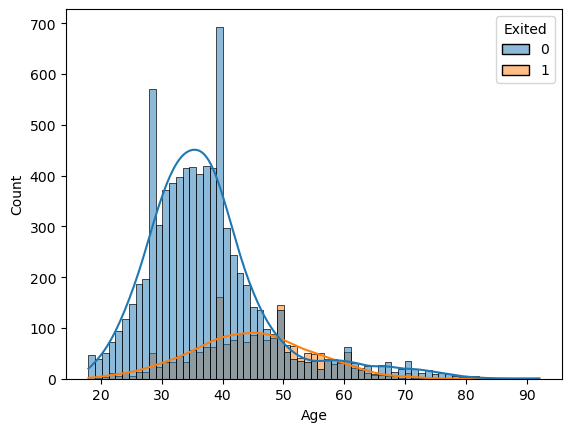

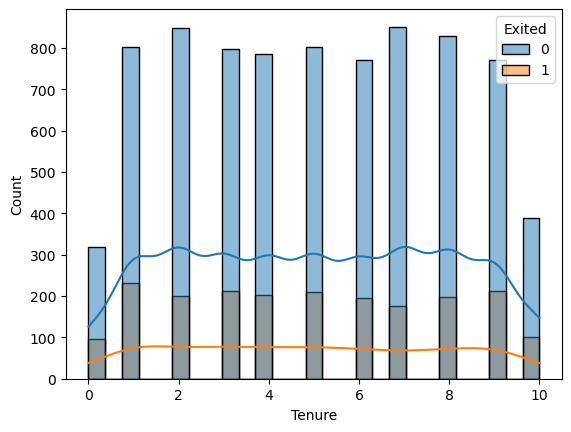

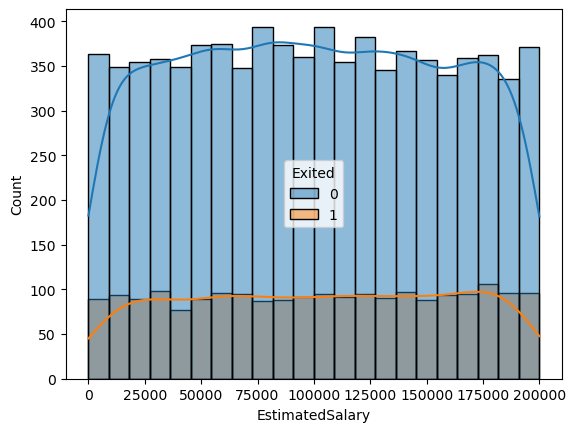

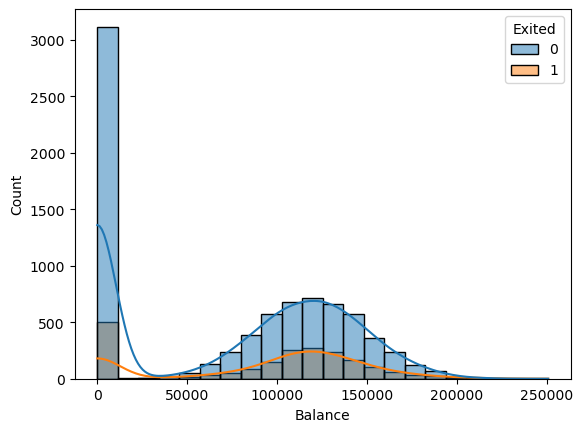

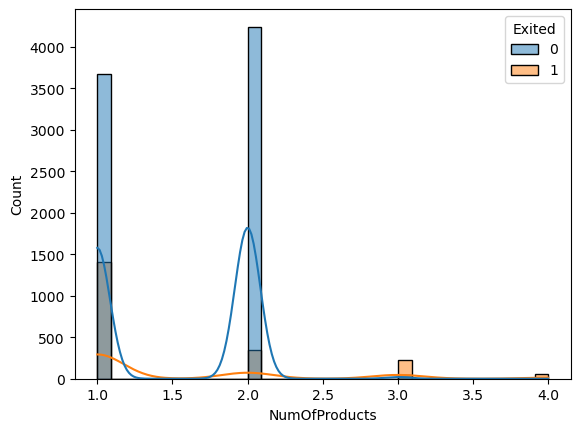

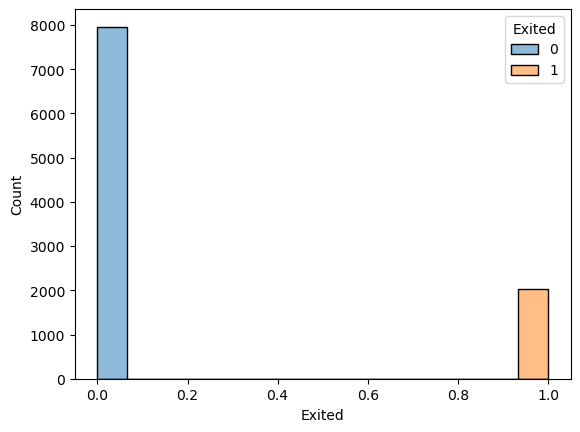

In [27]:
for var in churn_data.drop("CustomerId", axis = 1).select_dtypes("number"):
    sns.histplot(data=churn_data, x = var, hue="Exited", kde = True)
    plt.show()

- From the above histograms, we can arrive at the following insights:

- **Credit Score:**  
  - The KDE curve shows that churners (**Exited = 1**) have a slightly wider spread in credit scores, with peaks around 600-700, similar to non-churners.  
  - However, churners display more variability, indicated by a slightly flatter distribution.

- **Age:**  
  - The age distribution reveals that churners have a clear peak around **40-50 years old**, while non-churners are more concentrated in the **30-40 range**.  
  - The KDE shows a more pronounced curve for churners at older ages, indicating age could be a factor influencing churn.

- **Tenure:**  
  - Both churners and non-churners show a broad range of tenures, but churners tend to peak slightly lower, suggesting they exit earlier.  
  - The KDE smooths this out, showing a trend where churners have wider peaks at shorter tenures.

- **Estimated Salary:**  
  - The KDE curves for both churners and non-churners are almost identical, suggesting that **estimated salary** is not a strong factor influencing churn.  
  - The distributions are broad and even across different salary ranges, indicating no clear link between salary and churn.

- **Balance:**  
  - The histogram and KDE reveal that churners are more likely to have **higher balances**, with a peak near the upper range.  
  - Non-churners show a flatter distribution, indicating a more even spread across balance amounts.

- **Number of Products:**  
  - Churners appear to have a slightly higher frequency for **2 or more products** compared to non-churners.  
  - The KDE suggests that having multiple products might correlate with a higher likelihood of churn, hinting at over-leveraging.

## Step 4: Data Prep & Feature Engineering

- Here, we want to prepare the data for modeling through feature selection, feature engineering, and data splitting. We do this by:

    - Creating a new dataset that excludes any columns that aren’t be suitable for modeling
    - Creating dummy variables for categorical fields
    - Creating a new `balance_v_income` feature, which divides a customer’s bank balance by their estimated salary, then visualize that feature vs. churn status

In [28]:
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,15619304,Onio,502,France,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,15701354,Boni,699,France,Female,39.0,1,93826.63,0.00,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0


In [29]:
# looking at the above results, we can see that there are 2 primary columns that are not exactly useful and would
# have no effect on whether or not a customer churns/exits or not:
# customer ID
# surname
# so we will drop these

In [30]:
model_churn = churn_data.drop(["CustomerId", "Surname"], axis = 1)

# let's check if we have successfully dropped these:

model_churn.head()

,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,France,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,502,France,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,699,France,Female,39.0,1,93826.63,0.00,2,No,No,0
5,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0


In [31]:
# now let's create dummy variables
model_churn = pd.get_dummies(model_churn, drop_first = True)

In [32]:
# Creating a new balance_v_income feature

model_churn["bal_vs_sal"] = round((model_churn["Balance"] / model_churn["EstimatedSalary"]),2)
model_churn

,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes,bal_vs_sal
0,619,42.0,2,101348.88,0.00,1,1,0,0,0,1,1,0.00
2,608,41.0,1,112542.58,83807.86,1,0,0,1,0,1,1,0.74
3,502,42.0,8,113931.57,159660.80,3,1,0,0,0,0,0,1.40
4,699,39.0,1,93826.63,0.00,2,0,0,0,0,0,0,0.00
5,850,43.0,2,79084.10,125510.82,1,0,0,1,0,1,1,1.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,771,39.0,5,96270.64,0.00,2,0,0,0,1,0,0,0.00
9997,516,35.0,10,101699.77,57369.61,1,0,0,0,1,1,1,0.56
9998,709,36.0,7,42085.58,0.00,1,1,0,0,0,1,1,0.00
9999,772,42.0,3,92888.52,75075.31,2,1,1,0,1,0,0,0.81


In [33]:
# to check if our new variable is created and working properly
model_churn.describe()

,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes,bal_vs_sal
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921500,5.012800,100092.252506,76485.889288,1.530200,0.203700,0.250900,0.247700,0.545700,0.515100,0.515100,3.878711
std,96.653299,10.487552,2.892174,57510.146401,62397.405202,0.581654,0.402769,0.433553,0.431698,0.497932,0.499797,0.499797,108.337297
min,350.000000,18.000000,0.000000,11.580000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,51002.110000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,100196.062500,97198.540000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.750000
75%,718.000000,44.000000,7.000000,149388.247500,127644.240000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.510000
max,850.000000,92.000000,10.000000,199992.480000,250898.090000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10614.660000


<AxesSubplot:xlabel='Exited', ylabel='bal_vs_sal'>

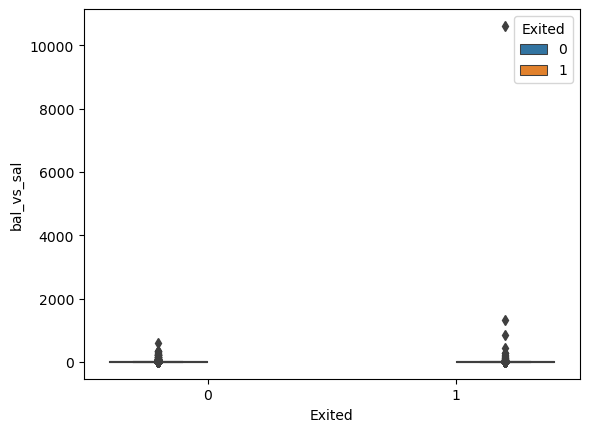

In [34]:
# then, visualize that feature vs. churn status
sns.boxplot(data=model_churn, x="Exited", y="bal_vs_sal", hue="Exited")

### Observation:
From the boxplot visualization, we observe that the `bal_vs_sal` (balance-to-income) ratio has some extreme outliers. These outliers are causing the majority of data points to be compressed near the lower end, making it difficult to clearly interpret any trends or differences between churners and non-churners. 

### Next Steps:
To address this issue, we can proceed with either of both options:
- **Option 1:** Remove extreme outliers by filtering out data points with unusually high `bal_vs_sal` ratios. This will allow us to focus on the majority of the data and get a clearer view of the overall distribution.

    OR
    
    
- **Option 2:** Apply a **log transformation** to compress the skewed data. This technique will help spread out the lower values and reduce the impact of extremely high ratios, providing a more balanced comparison between the two groups. You can do this with the `log1p` function in the numpy library.


- Let us go with Option 1

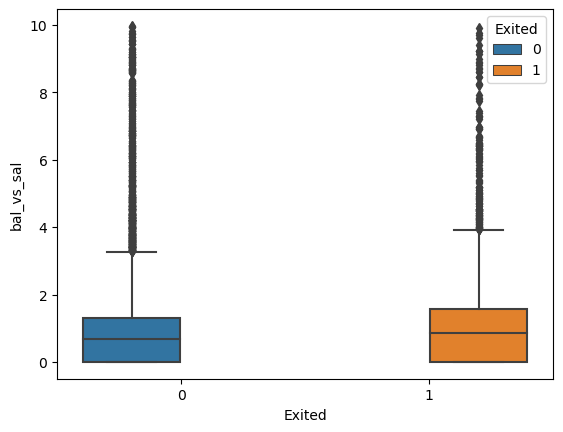

In [35]:
# Remove extreme outliers by limiting to a reasonable ratio range
out_churn = model_churn[model_churn["bal_vs_sal"] < 10]
sns.boxplot(data=out_churn, x="Exited", y="bal_vs_sal", hue="Exited")
plt.show()

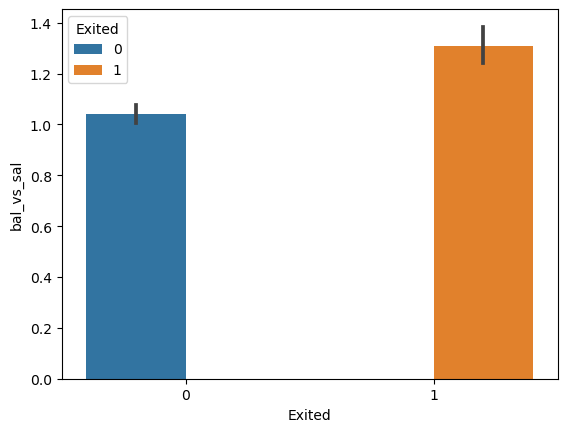

In [36]:
# create a barplot with the same filtered data
sns.barplot(data=out_churn, x="Exited", y="bal_vs_sal", hue="Exited")
plt.show()

### Analysis of Balance vs. Income Ratio (`bal_vs_sal`) and Its Relation to Churn:

From the above visualizations, we can draw the following insights:

- **Boxplot Analysis:**

  - The boxplot shows the distribution of the `bal_vs_sal` (balance-to-income) ratio for both churners (**Exited = 1**) and non-churners (**Exited = 0**).
  - We observe that both groups have a relatively **low median ratio** close to **1**, indicating that most customers maintain a balance that is roughly equal to their income.
  - **Median Comparison:** The median values for churners and non-churners are quite similar. Non-churners seem to have a slightly higher median, but the difference isn't substantial. This suggests that the balance-to-income ratio alone might not strongly distinguish between those who churn and those who stay.
  - **Outliers:** There are some outliers, particularly on the upper end, for both churners and non-churners. However, the spread of data remains consistent, indicating that the outliers do not heavily skew the interpretation.
  
  

- **Barplot Analysis:**

  - The barplot further illustrates the **average `bal_vs_sal` ratio** across churn status.
  - **Average Comparison:** The average ratio appears slightly **higher for churners (Exited = 1)** compared to non-churners (Exited = 0). This suggests that customers with a higher balance relative to their income might be more likely to churn. However, the difference is not very pronounced, and further analysis would be needed to establish a strong connection.
  - **Confidence Intervals:** The overlapping confidence intervals (error bars) indicate that the differences in average ratios may not be statistically significant. This is a signal that, while there may be a slight trend, it is not definitive on its own.

### Potential Relevance for our Machine Learning Project:

- Given the insights from the visualizations, we can make the following considerations about including `bal_vs_sal` in our machine learning model (next project):

- **Predictive Potential:** Although the `bal_vs_sal` variable does not show a strong standalone signal, it still might have predictive value when combined with other features. For instance, it can be used alongside other financial indicators (like credit score or number of products owned) to enhance the model’s ability to predict churn.
- **Further Analysis Needed:** To determine its actual usefulness, we should perform additional steps such as **correlation testing** or **feature importance analysis** once the model is trained. These methods will help confirm whether `bal_vs_sal` significantly contributes to predicting churn.
- **Next Steps in Feature Engineering:** We could further refine the feature by creating combined metrics. For example, comparing `bal_vs_sal` against other attributes like **account tenure** or **credit score** may reveal more meaningful patterns.



- In summary, the `bal_vs_sal` feature provides some insights, but more detailed statistical analysis and feature engineering is needed to unlock its full predictive potential in a machine learning model. 


- We will explore this in the next project where we will build a classification model to predict which bank customers are most likely to churn.


- See you there!